Initial setup and first topic model run

In [1]:
%run "Common setup.ipynb"

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\wosis\query.py:49: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  wos_config = yaml.load(config)


In [2]:
RC = mk.RecordCollection("{}/rest_requested_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

<hr> Running topic model on corpora

In [3]:
topic_results = wosis.find_topics(corpora_df, num_topics=5, 
                                  cache_as='{}/filtered_corpora_topics'.format(TMP_DIR))

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator NMF from version 0.20.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Topic 1: model parameters sensitivity models data analysis parameter flow calibration time
Topic 2: optimization design method shape topology problem sensitivity element structural finite
Topic 3: uncertainty stochastic quantification carlo monte bayesian method uncertainties random polynomial
Topic 4: risk emissions energy assessment environmental exposure production cost health analysis
Topic 5: water soil climate river quality groundwater change management land runoff


First we check that a specific paper of interest was included in one of the topics as a high-level check 

    Title: "Uncertainty in the environmental modelling process - A framework and guidance"
    DOI: "10.1016/j.envost.2007.02.004"

In [4]:
relevant_topic = topic_results.find_paper_by_doi('10.1016/j.envost.2007.02.004')

Found in topic 3


We then select topic 1, 2, and 3 (taken to be the senstivity, model optimization, and uncertainty topics respectively)

In [5]:
model_param_df = topic_results.get_topic_by_id(1)
opti_design_df = topic_results.get_topic_by_id(2)
uncert_df = topic_results.get_topic_by_id(3)

In [6]:
model_param_rc = wosis.extract_recs(model_param_df.id, RC, name='model_param')
opti_design_rc = wosis.extract_recs(opti_design_df.id, RC, name='opti_design')
uncert_rc = wosis.extract_recs(uncert_df.id, RC, name='uncert')

In [7]:
topics_combined = model_param_rc + opti_design_rc + uncert_rc

In [8]:
# Interested in the number of publications at each topic model iteration
filter_progress = [len(corpora_df)]
filter_progress.append(len(topics_combined))

In [9]:
uasa_opt_topic_df = wosis.rc_to_df(topics_combined)
uasa_opt_topic_df.to_csv('{}/uasa_opt_topic_df.csv'.format(DATA_DIR))

In [10]:
topics_combined_results = wosis.find_topics(uasa_opt_topic_df, num_topics=5,
                                           cache_as='{}/uasa_opt_subtopics'.format(TMP_DIR))

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator NMF from version 0.20.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Topic 1: model sensitivity parameters analysis data flow models parameter soil results
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte model quantification models analysis data
Topic 4: stochastic random method polynomial chaos quantification expansion equations collocation solution
Topic 5: neural network ann artificial networks fuzzy prediction algorithm models regression


Subtopics of interest are:
* model sensitivity (Topic 1)
* optimization and design (Topic 2)
* uncertainties  (Topic 3)
* stochastic methods (Topic 4)

The IDs may change if this is being run without the cached datasets. We cannot provide these as they contain proprietary WoS data.

In [11]:
model_sens_df = topics_combined_results.get_topic_by_id(1)
opti_design_df = topics_combined_results.get_topic_by_id(2)
uncert_bayes_df = topics_combined_results.get_topic_by_id(3)
stochastic_meth_df = topics_combined_results.get_topic_by_id(4)

In [12]:
st_model_sens_rc = wosis.extract_recs(model_sens_df.id, RC, name='model_sens')
st_opti_design_rc = wosis.extract_recs(opti_design_df.id, RC, name='opti_design')
st_uncert_bay_rc = wosis.extract_recs(uncert_bayes_df.id, RC, name='uncert_bay')
st_stoch_rc = wosis.extract_recs(stochastic_meth_df.id, RC, name='stochastic')

In [13]:
subtopics_combined = st_model_sens_rc + st_opti_design_rc + st_uncert_bay_rc + st_stoch_rc

In [14]:
filter_progress.append(len(subtopics_combined))

In [15]:
uasa_combined_df = wosis.rc_to_df(subtopics_combined)
uasa_combined_df.to_csv('{}/uasa_subtopics_combined.csv'.format(DATA_DIR))

Once again, we apply the topic model

In [16]:
subtopics_combined_results = wosis.find_topics(uasa_combined_df, num_topics=5,
                                               cache_as='{}/uasa_subsubtopics_combined'.format(TMP_DIR))

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator NMF from version 0.20.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Topic 1: model sensitivity parameters analysis data models parameter calibration based soil
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 4: stochastic random polynomial method chaos quantification expansion equations problems collocation
Topic 5: flow transport aquifer sediment groundwater hydraulic field rate velocity concentration


Subtopics of interest are:
* model sensitivity (Topic 1)
* optimization and design (Topic 2)
* uncertainties  (Topic 3)
* stochastic/quantification methods (Topic 4)

In [17]:
sst_model_sa = subtopics_combined_results.get_topic_by_id(1)
sst_opt_design = subtopics_combined_results.get_topic_by_id(2)
sst_ua = subtopics_combined_results.get_topic_by_id(3)
sst_stochastic = subtopics_combined_results.get_topic_by_id(4)

In [18]:
sst_model_sa_rc = wosis.extract_recs(sst_model_sa.id, RC, name='model_sens2')
sst_opt_design_rc = wosis.extract_recs(sst_opt_design.id, RC, name='opti_design3')
sst_ua_rc = wosis.extract_recs(sst_ua.id, RC, name='uncertainty')
sst_stochastic_rc = wosis.extract_recs(sst_stochastic.id, RC, name='stochastic quantification')

In [19]:
subsubtopics_combined = sst_model_sa_rc + sst_opt_design_rc + sst_ua_rc + sst_stochastic_rc

In [20]:
filter_progress.append(len(subsubtopics_combined))

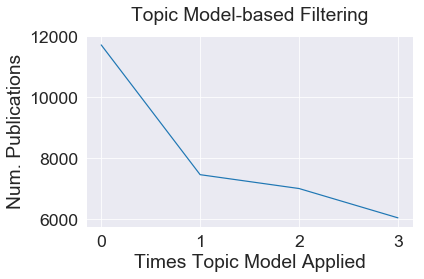

In [21]:
plt.plot(range(len(filter_progress)), filter_progress)
plt.title("Topic Model-based Filtering")
plt.xlabel('Times Topic Model Applied')
plt.ylabel('Num. Publications');

ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.tight_layout()
plt.savefig('{}/Figure_15.png'.format(FIG_DIR), dpi=300, format='png')

In [22]:
subsubtopics_combined_df = wosis.rc_to_df(subsubtopics_combined)
subsubtopics_combined_df.to_csv('{}/subsubtopics_combined.csv'.format(DATA_DIR))

Re-running topic model one last time to see if any new topics appear - they do not which suggests we have identified all relevant publications

In [23]:
subsubtopics_combined_results = wosis.find_topics(subsubtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter results based soil
Topic 2: optimization design shape topology method sensitivity structural element problem analysis
Topic 3: stochastic random polynomial method chaos quantification expansion equations collocation solution
Topic 4: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 5: rainfall flood runoff hydrological catchment model calibration watershed distributed catchments


<hr>

Plotting topic and publication trends for UA, SA, optimization.

In [24]:
sst_model_sa_rc.name = 'SA'
sst_opt_design_rc.name = 'Optimization'

UA_rc = sst_ua_rc + sst_stochastic_rc
UA_rc.name = 'UQ'

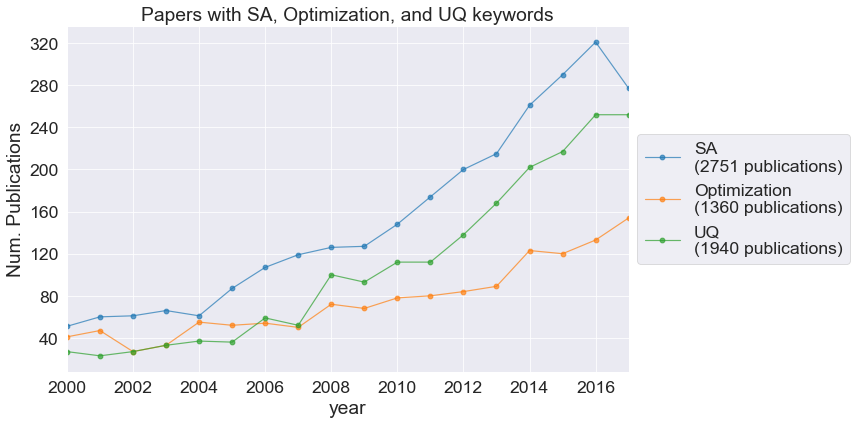

In [25]:
wos_plot.plot_topic_trend([sst_model_sa_rc, sst_opt_design_rc, UA_rc], 
                          title='Papers with SA, Optimization, and UQ keywords')

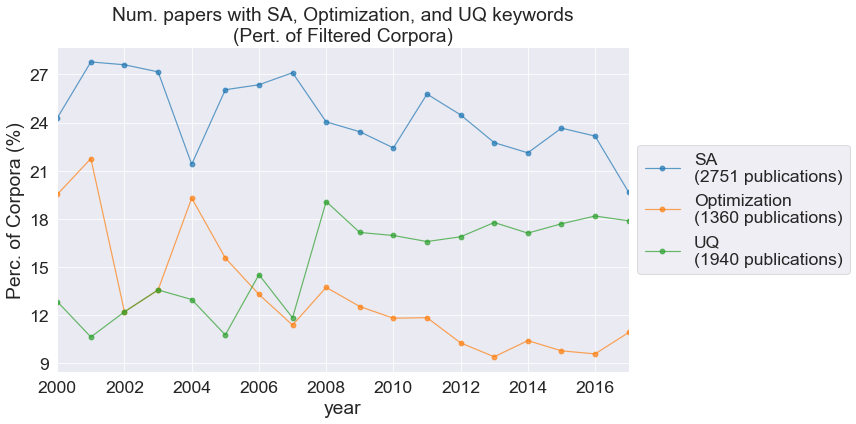

In [26]:
wos_plot.plot_topic_trend([sst_model_sa_rc, sst_opt_design_rc, UA_rc], 
                          total_rc=RC, 
                          title='Num. papers with SA, Optimization, and UQ keywords\n(Pert. of Filtered Corpora)')

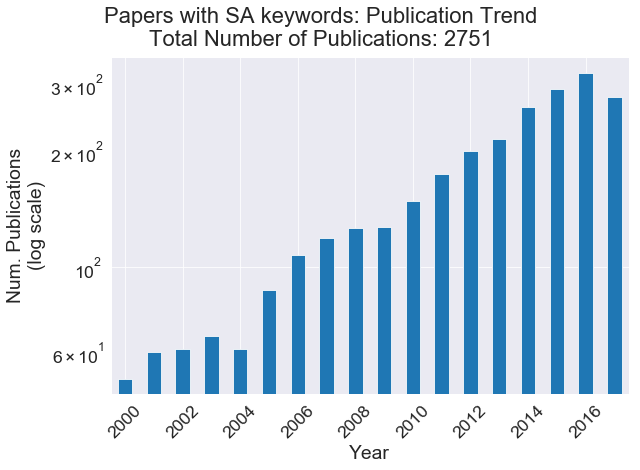

In [27]:
wos_plot.plot_pub_trend(sst_model_sa_rc, title='Papers with SA keywords: Publication Trend')

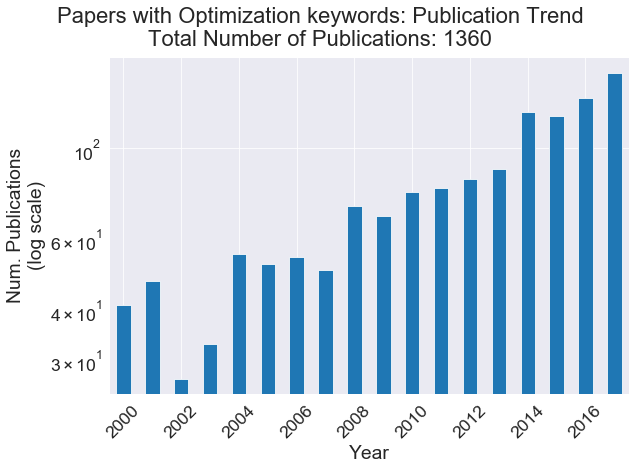

In [28]:
wos_plot.plot_pub_trend(sst_opt_design_rc, title='Papers with Optimization keywords: Publication Trend')

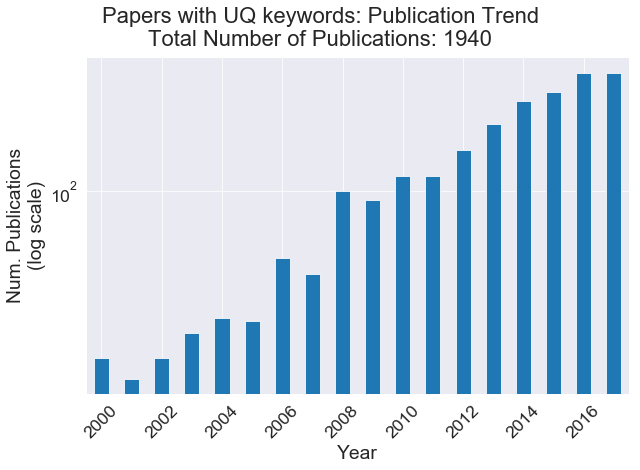

In [29]:
wos_plot.plot_pub_trend(UA_rc, title='Papers with UQ keywords: Publication Trend')

<hr>
Identifying papers relevant to frameworks and applications of UA/SA from the UA, SA, optimization topics.

In [30]:
all_uasa_sst_papers = sst_model_sa_rc + sst_opt_design_rc + UA_rc

In [31]:
wosis.rc_to_df(all_uasa_sst_papers).to_csv('{}/ua_sa_sst_papers.csv'.format(DATA_DIR))

1. Frameworks and guidelines for UA/SA

In [32]:
framework_kw = ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic']
all_frameworks = wosis.find_keywords(all_uasa_sst_papers, framework_kw, threshold=95.0)

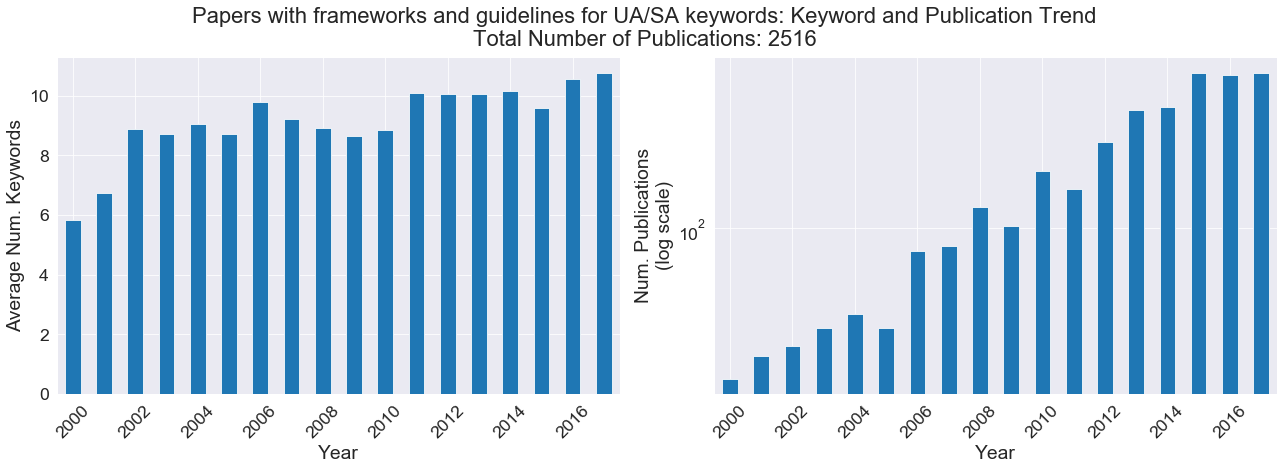

In [33]:
fig_title = 'Papers with frameworks and guidelines for UA/SA keywords: Keyword and Publication Trend'
wos_plot.plot_kw_trend(all_frameworks, title=fig_title)

Removing Frameworks papers from the 'new collection'

After the first citation analysis of these papers, it was clear that there was significant overlap between the Frameworks and Applications sub-corpora. Publications in both Frameworks and Applications sub-corpora were found to be more relevant to Frameworks than Applications.  
<br> Without removing the Frameworks corpora, the Applications corpora comprised 4338 publications.  1933 (45%) of these were from the Frameworks collection.  A key-phrase analysis found that the overlapping publications were more relevant to the Frameworks collection than the Applications collection.
<br> Hence, after the first keyword match, the papers matching to Frameworks were removed from the combined corpora before performing a keyword-match for applications on the remaining papers in the collection.

In [34]:
wo_frameworks = mk.RecordCollection(name='without_frameworks')
for record in all_uasa_sst_papers:
    if not all_frameworks.containsID(record.id):
        wo_frameworks.add(record)

2. Applications of UA/SA

In [35]:
application_kw = ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment']

all_applications = wosis.find_keywords(wo_frameworks, application_kw, threshold=95.0)

In [36]:
(wosis.rc_to_df(all_applications)).to_csv('{}/all_applications.csv'.format(DATA_DIR), index=False)

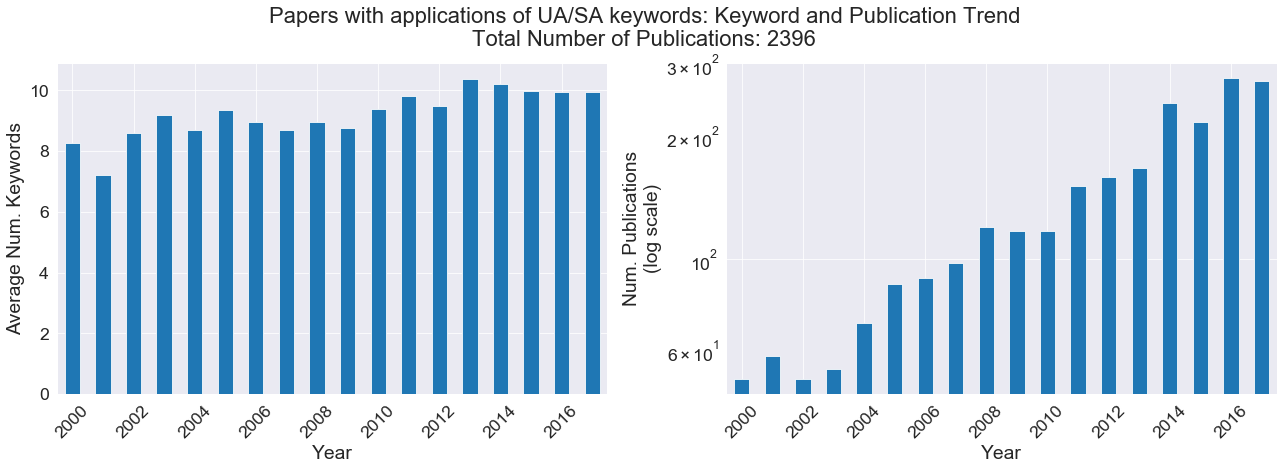

In [37]:
fig_title = 'Papers with applications of UA/SA keywords: Keyword and Publication Trend'
wos_plot.plot_kw_trend(all_applications, title=fig_title)

Trends

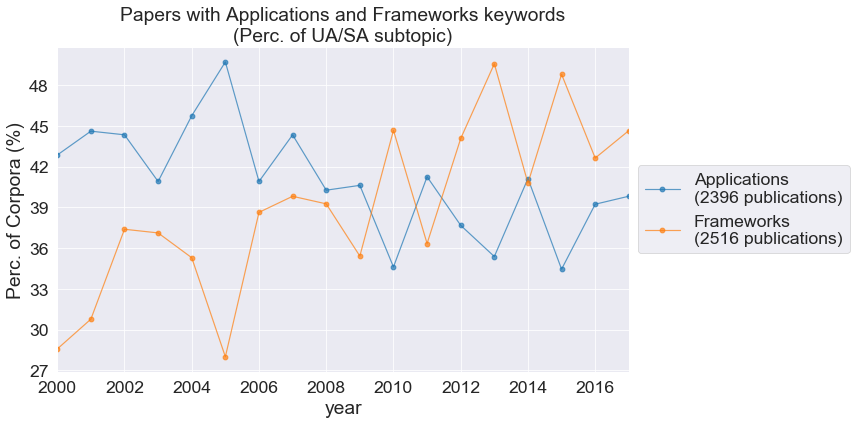

In [38]:
all_applications.name = 'Applications'
all_frameworks.name = 'Frameworks'
wos_plot.plot_topic_trend([all_applications, all_frameworks], 
                          total_rc=all_uasa_sst_papers, 
                          title='Papers with Applications and Frameworks keywords\n(Perc. of UA/SA subtopic)',
                          save_plot_fn='{}/Figure_4_b.png'.format(FIG_DIR))

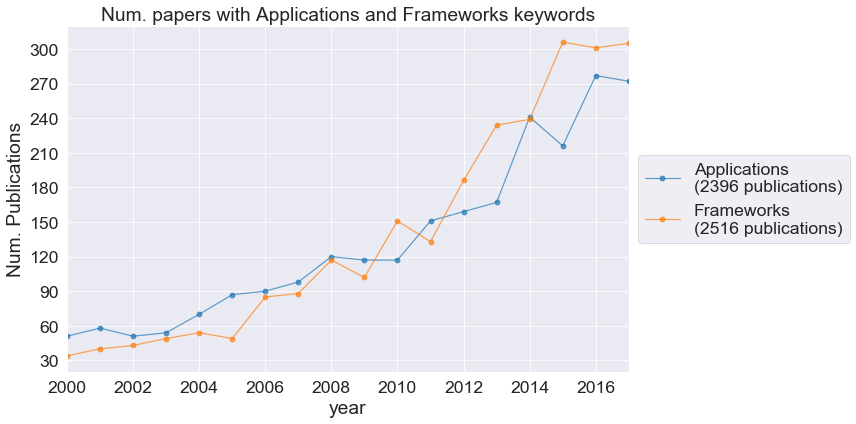

In [39]:
# wos_plot.plot_topic_trend([applications, frameworks], title='Keyword matches topic trend', save_plot_fn='figs/combined_topics_keyword_trend.png')
wos_plot.plot_topic_trend([all_applications, all_frameworks], 
                          title='Num. papers with Applications and Frameworks keywords', 
                          save_plot_fn='{}/Figure_4_a.png'.format(FIG_DIR))

Top cited journals
<br> 1. Frameworks

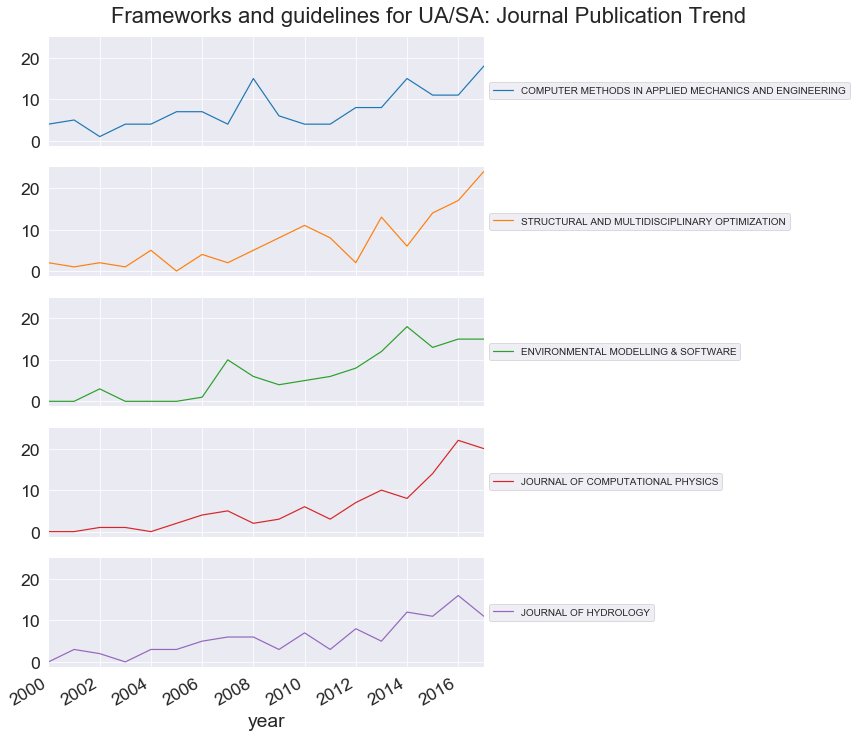

In [40]:
wos_plot.plot_journal_pub_trend(all_frameworks, 
                                top_n=5, 
                                save_plot_fn='{}/Figure_5.png'.format(FIG_DIR), 
                                title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

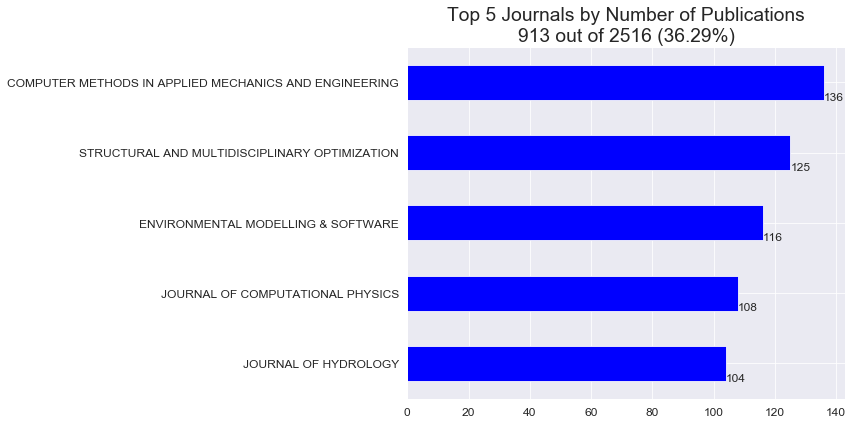

In [41]:
wos_plot.plot_pubs_per_journal(all_frameworks,
                               top_n=5, 
                               annotate=True, 
                               show_stats=True)

In [42]:
journal_titles = ['Environmental Modelling & Software', 'Journal of Hydrology', 
                  'Journal of Computational Physics', 'Structural and Multidisciplinary Optimization', 
                  'Computer Methods in Applied Mechanics and Engineering']

journals_of_interest_frameworks = list(map(str.upper, journal_titles))
pubs_for_journals_frameworks = wosis.find_pubs_by_journal(all_frameworks, journals_of_interest_frameworks)

In [43]:
# Get citations for each paper
cache_fn = "{}/framework_citations_".format(TMP_DIR)

paper_citations_per_journal_frameworks = {}
for pubs in pubs_for_journals_frameworks:
    paper_citations_per_journal_frameworks[pubs] = wosis.get_num_citations(pubs_for_journals_frameworks[pubs], WOS_CONFIG, 
                                                                           cache_as=cache_fn+pubs)
    
    paper_citations_per_journal_frameworks[pubs] = wosis.calc_average_citations(
        paper_citations_per_journal_frameworks[pubs], max_year=2017
    )


In [44]:
cache_fn = '{}/framework_citations_'.format(TMP_DIR)

# Get citations for each paper and cache results
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_frameworks:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_frameworks[pubs], WOS_CONFIG,
                                                                    cache_as=cache_fn+pubs)

    # Calc average citations as well
    paper_citations_per_journal_framework[pubs] = wosis.calc_average_citations(
        paper_citations_per_journal_framework[pubs], max_year=2017
    )

In [45]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'Avg. Citations', 'abstract', 'DOI', 'DOI link', 'id']
collection_frameworks = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_frameworks.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_frameworks = collection_frameworks.append(df[cols_of_interest], ignore_index=True)
    
collection_frameworks.AU = collection_frameworks.AU.str.replace("|", " | ")

In [46]:
top_cited_in_top_journals_frameworks = collection_frameworks.sort_values('citations', ascending=False)

tmp_df = top_cited_in_top_journals_frameworks
tmp_df.head(10)

,AU,year,title,journal,citations,Avg. Citations,abstract,DOI,DOI link,id
473,"Bennett, ND | Croke, BFW | Guariso, G | Guilla...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,595,119.00,In order to use environmental models effective...,10.1016/j.envsoft.2012.09.011,https://dx.doi.org/10.1016/j.envsoft.2012.09.011,WOS:000314074000001
474,"Refsgaard, JC | van der Sluijs, JP | Hojberg, ...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,517,47.00,A terminology and typology of uncertainty is p...,10.1016/j.envost.2007.02.004,https://dx.doi.org/10.1016/j.envsoft.2007.02.004,WOS:000248233200001
0,"Sigmund, O | Maute, K",2013,Topology optimization approaches A comparative...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,405,81.00,Topology optimization has undergone a tremendo...,10.1007/s00158-013-0978-6,https://dx.doi.org/10.1007/s00158-013-0978-6,WOS:000328211600001
369,"Yang, J | Reichert, P | Abbaspour, KC | Xia, J...",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,316,31.60,Distributed watershed models are increasingly ...,10.1016/j.jhydrol.2008.05.012,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012,WOS:000258853700001
125,"Blatman, G | Sudret, B",2011,Adaptive sparse polynomial chaos expansion bas...,JOURNAL OF COMPUTATIONAL PHYSICS,261,37.29,Polynomial chaos (PC) expansions are used in s...,10.1016/j.jcp.2010.12.021,https://dx.doi.org/10.1016/j.jcp.2010.12.021,WOS:000287425400009
233,"Moens, D | Vandepitte, D",2005,A survey of non-probabilistic uncertainty trea...,COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,238,18.31,The objective of this paper is to critically r...,10.1016/j.cma.2004.03.019,https://dx.doi.org/10.1016/j.cma.2004.03.019,WOS:000227483200012
1,"van Dijk, NP | Maute, K | Langelaar, M | van K...",2013,Level-set methods for structural topology opti...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,207,41.40,This review paper provides an overview of diff...,10.1007/s00158-013-0912-y,https://dx.doi.org/10.1007/s00158-013-0912-y,WOS:000325079300001
2,"Shan, SQ | Wang, GG",2010,Survey of modeling and optimization strategies...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,194,24.25,The integration of optimization methodologies ...,10.1007/s00158-009-0420-2,https://dx.doi.org/10.1007/s00158-009-0420-2,WOS:000274043200005
370,"Kuczera, G | Kavetski, D | Franks, S | Thyer, M",2006,Towards a Bayesian total error analysis of con...,JOURNAL OF HYDROLOGY,183,15.25,Calibration and prediction in conceptual rainf...,10.1016/j.jhydrol.2006.05.010,https://dx.doi.org/10.1016/j.jhydrol.2006.05.010,WOS:000242329500014
234,"Roy, CJ | Oberkampf, WL",2011,"A comprehensive framework for verification, va...",COMPUTER METHODS IN APPLIED MECHANICS AND ENGI...,171,24.43,An overview of a comprehensive framework is gi...,10.1016/j.cma.2011.03.016,https://dx.doi.org/10.1016/j.cma.2011.03.016,WOS:000291902400002


In [47]:
# export_df = top_cited_in_top_journals_frameworks.loc[:, ~top_cited_in_top_journals_frameworks.columns.isin(hide_columns)]
# export_df.to_csv('{}/framework_top_cited_in_top_journals.csv'.format(DATA_DIR), index=False)

Determining the top papers by average citations since publication

In [48]:
# collection_framework_avg = top_cited_in_top_journals_frameworks.sort_values('Avg. Citations', ascending=False)
# export_df = collection_framework_avg.loc[:, ~collection_framework_avg.columns.isin(hide_columns)]

# export_df.head(10)

In [49]:
#export_df.to_csv('{}/framework_top_avg_cited_in_top_journals.csv'.format(DATA_DIR), index=False)

In [50]:
# top_cited_in_top_journals_frameworks.groupby('year').count()['AU'].plot()
# top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()
# framework_top_cited = wosis.extract_recs(top_cited_in_top_journals_frameworks.id[0:50], RC)
# wos_plot.plot_pub_trend(framework_top_cited)

Keyphrase analysis of the top-cited Frameworks publications

In [51]:
frameworks_phrases = wosis.analysis.constrain.find_phrases(top_cited_in_top_journals_frameworks)

In [52]:
frameworks_phrases.all_phrases.to_csv('{}/framework_phrases.csv'.format(DATA_DIR))

2. Applications

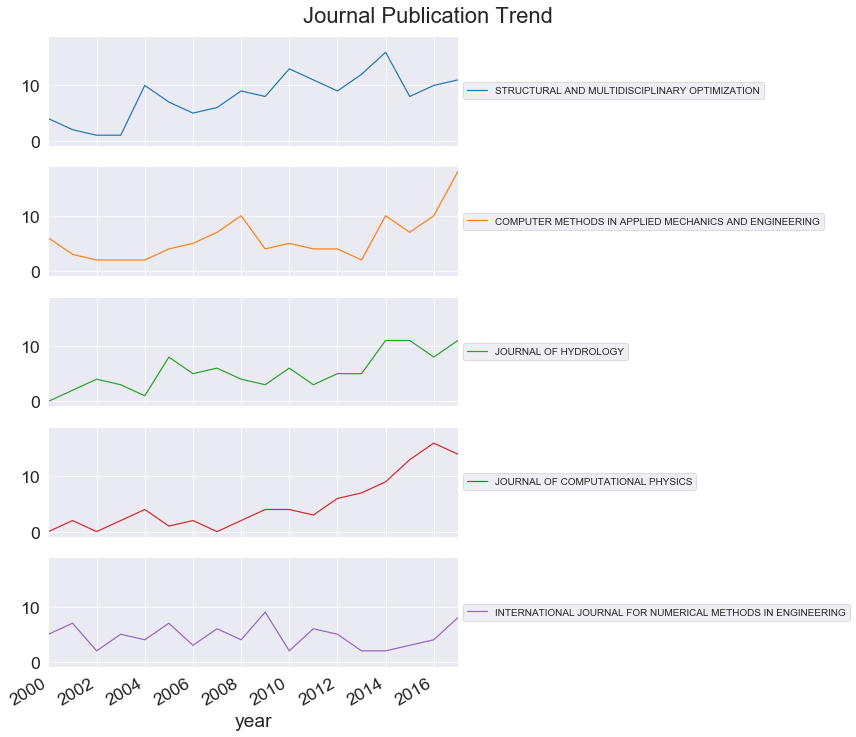

In [53]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, 
                                save_plot_fn='{}/Figure_7.png'.format(FIG_DIR))

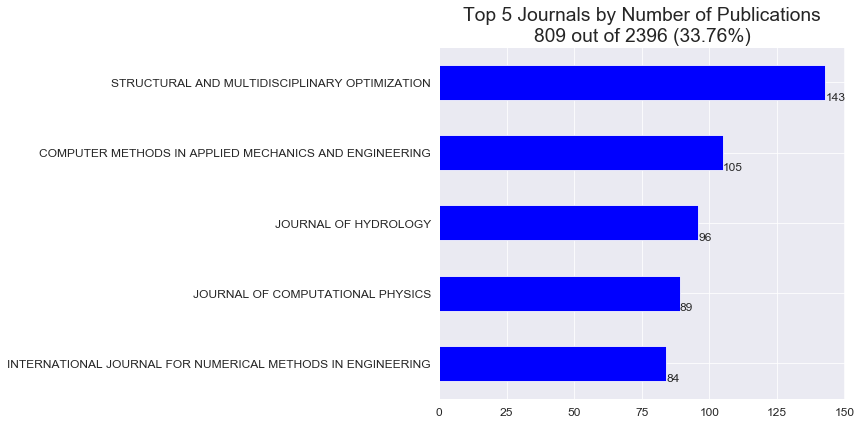

In [54]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True)

In [55]:
journals_of_interest_app = map(str.upper, ['Structural and Multidisciplinary Optimization', 
                                           'Journal of Hydrology',
                                           'Computer Methods in Applied Mechanics and Engineering',
                                           'Journal of Computational Physics',
                                           'International Journal for Numerical Methods in Engineering'])
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, list(journals_of_interest_app))

In [56]:
cache_fn = '{}/application_citations_'.format(TMP_DIR)
paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], WOS_CONFIG, 
                                                                    cache_as=cache_fn+pubs)

    # Calc average citations as well
    paper_citations_per_journal_app[pubs] = wosis.calc_average_citations(paper_citations_per_journal_app[pubs],
                                                                        max_year=2017)

In [57]:
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest], ignore_index=True)

In [58]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.AU = top_cited_in_top_journals_app.AU.str.replace("|", " | ")
top_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,Avg. Citations,abstract,DOI,DOI link,id
84,"Yang, J | Reichert, P | Abbaspour, KC | Xia, J...",2008,Comparing uncertainty analysis techniques for ...,Applications_JOURNAL OF HYDROLOGY,316,31.60,Distributed watershed models are increasingly ...,10.1016/j.jhydrol.2008.05.012,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012,WOS:000258853700001
0,"Pedersen, CBW | Buhl, T | Sigmund, O",2001,Topology synthesis of large-displacement compl...,Applications_INTERNATIONAL JOURNAL FOR NUMERIC...,237,13.94,This paper describes the use of topology optim...,10.1002/nme.148,https://dx.doi.org/10.1002/nme.148,WOS:000167970600005
464,"Le Maitre, OP | Knio, OM | Najm, HN | Ghanem, RG",2004,Uncertainty propagation using Wiener-Haar expa...,Applications_JOURNAL OF COMPUTATIONAL PHYSICS,209,14.93,An uncertainty quantification scheme is constr...,10.1016/j.jcp.2003.11.033,https://dx.doi.org/10.1016/j.jcp.2003.11.033,WOS:000221833000002
85,"McVicar, TR | Van Niel, TG | Li, LT | Hutchins...",2007,Spatially distributing monthly reference evapo...,Applications_JOURNAL OF HYDROLOGY,205,18.64,Many hydrological models engage spatially dist...,10.1016/j.jhydrol.2007.02.018,https://dx.doi.org/10.1016/j.jhydrol.2007.02.018,WOS:000247196600003
86,"Pappenberger, F | Beven, K | Horritt, M | Blaz...",2005,Uncertainty in the calibration of effective ro...,Applications_JOURNAL OF HYDROLOGY,201,15.46,An uncertainty analysis of the unsteady flow c...,10.1016/j.jhydrol.2004.06.036,https://dx.doi.org/10.1016/j.jhydrol.2004.06.036,WOS:000226396500004
87,"Gong, LB | Xu, CY | Chen, DL | Halldin, S | Ch...",2006,Sensitivity of the Penman-Monteith reference e...,Applications_JOURNAL OF HYDROLOGY,200,16.67,Sensitivity analysis is important in understan...,10.1016/j.jhydrol.2006.03.027,https://dx.doi.org/10.1016/j.jhydrol.2006.03.027,WOS:000241295200022
465,"Le Maitre, OP | Najm, HN | Ghanem, RG | Knio, OM",2004,Multi-resolution analysis of Wiener-type uncer...,Applications_JOURNAL OF COMPUTATIONAL PHYSICS,181,12.93,A multi-resolution analysis (MRA) is applied t...,10.1016/j.jcp.2003.12.020,https://dx.doi.org/10.1016/j.jcp.2003.12.020,WOS:000222184700005
466,"Oberkampf, WL | Barone, MF",2006,Measures of agreement between computation and ...,Applications_JOURNAL OF COMPUTATIONAL PHYSICS,176,14.67,With the increasing role of computational mode...,10.1016/j.jcp.2006.03.037,https://dx.doi.org/10.1016/j.jcp.2006.03.037,WOS:000239904500002
1,"Stegmann, J | Lund, E",2005,Discrete material optimization of general comp...,Applications_INTERNATIONAL JOURNAL FOR NUMERIC...,169,13.00,A novel method for doing material optimization...,10.1002/nme.1259,https://dx.doi.org/10.1002/nme.1259,WOS:000228095700005
321,"Kharmanda, G | Olhoff, N | Mohamed, A | Lemair...",2004,Reliability-based topology optimization,Applications_STRUCTURAL AND MULTIDISCIPLINARY ...,154,11.00,The objective of this work is to integrate rel...,10.1007/s00158-003-0322-7,https://dx.doi.org/10.1007/s00158-003-0322-7,WOS:000220206800001


In [59]:
top_avg_cited_in_top_journals_app = collection_app.sort_values('Avg. Citations', ascending=False)
top_avg_cited_in_top_journals_app.AU = top_avg_cited_in_top_journals_app.AU.str.replace("|", " | ")
top_avg_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,Avg. Citations,abstract,DOI,DOI link,id
84,"Yang, J | Reichert, P | Abbaspour, KC | Xia, J...",2008,Comparing uncertainty analysis techniques for ...,Applications_JOURNAL OF HYDROLOGY,316,31.60,Distributed watershed models are increasingly ...,10.1016/j.jhydrol.2008.05.012,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012,WOS:000258853700001
219,"Wang, YQ | Luo, Z | Kang, Z | Zhang, N",2015,A multi-material level set-based topology and ...,Applications_COMPUTER METHODS IN APPLIED MECHA...,69,23.00,This paper proposes a new Multi-Material Level...,10.1016/j.cma.2014.11.002,https://dx.doi.org/10.1016/j.cma.2014.11.002,WOS:000345858700065
85,"McVicar, TR | Van Niel, TG | Li, LT | Hutchins...",2007,Spatially distributing monthly reference evapo...,Applications_JOURNAL OF HYDROLOGY,205,18.64,Many hydrological models engage spatially dist...,10.1016/j.jhydrol.2007.02.018,https://dx.doi.org/10.1016/j.jhydrol.2007.02.018,WOS:000247196600003
87,"Gong, LB | Xu, CY | Chen, DL | Halldin, S | Ch...",2006,Sensitivity of the Penman-Monteith reference e...,Applications_JOURNAL OF HYDROLOGY,200,16.67,Sensitivity analysis is important in understan...,10.1016/j.jhydrol.2006.03.027,https://dx.doi.org/10.1016/j.jhydrol.2006.03.027,WOS:000241295200022
89,"Oh, HJ | Kim, YS | Choi, JK | Park, E | Lee, S",2011,GIS mapping of regional probabilistic groundwa...,Applications_JOURNAL OF HYDROLOGY,109,15.57,This study analyzed the relationships between ...,10.1016/j.jhydrol.2010.12.027,https://dx.doi.org/10.1016/j.jhydrol.2010.12.027,WOS:000288828500003
86,"Pappenberger, F | Beven, K | Horritt, M | Blaz...",2005,Uncertainty in the calibration of effective ro...,Applications_JOURNAL OF HYDROLOGY,201,15.46,An uncertainty analysis of the unsteady flow c...,10.1016/j.jhydrol.2004.06.036,https://dx.doi.org/10.1016/j.jhydrol.2004.06.036,WOS:000226396500004
104,"Sattar, AMA | Gharabaghi, B",2015,Gene expression models for prediction of longi...,Applications_JOURNAL OF HYDROLOGY,46,15.33,Longitudinal dispersion is the key hydrologic ...,10.1016/j.jhydrol.2015.03.016,https://dx.doi.org/10.1016/j.jhydrol.2015.03.016,WOS:000354503300046
147,"Brunetti, G | Simunek, J | Turco, M | Piro, P",2017,On the use of surrogate-based modeling for the...,Applications_JOURNAL OF HYDROLOGY,15,15.00,Mechanistic models have proven to be accurate ...,10.1016/j.jhydrol.2017.03.013,https://dx.doi.org/10.1016/j.jhydrol.2017.03.013,WOS:000403739000021
263,"Wang, ZP | Poh, LH | Dirrenberger, J | Zhu, YL...",2017,Isogeometric shape optimization of smoothed pe...,Applications_COMPUTER METHODS IN APPLIED MECHA...,15,15.00,An important feature that drives the auxetic b...,10.1016/j.cma.2017.05.013,https://dx.doi.org/10.1016/j.cma.2017.05.013,WOS:000406570900010
464,"Le Maitre, OP | Knio, OM | Najm, HN | Ghanem, RG",2004,Uncertainty propagation using Wiener-Haar expa...,Applications_JOURNAL OF COMPUTATIONAL PHYSICS,209,14.93,An uncertainty quantification scheme is constr...,10.1016/j.jcp.2003.11.033,https://dx.doi.org/10.1016/j.jcp.2003.11.033,WOS:000221833000002


In [60]:
export_ds = top_cited_in_top_journals_app.loc[:, top_cited_in_top_journals_app.columns != 'id']
export_ds.to_csv('{}/top_cited_in_top_journals_app.csv'.format(DATA_DIR), index=False)

In [61]:
export_ds = top_avg_cited_in_top_journals_app.loc[:, top_avg_cited_in_top_journals_app.columns != 'id']
export_ds.to_csv('{}/top_avg_cited_in_top_journals_app.csv'.format(DATA_DIR), index=False)

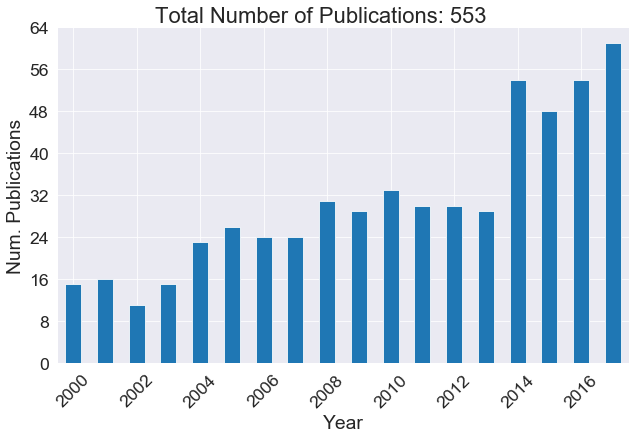

In [62]:
application_top_cited = wosis.extract_recs(top_cited_in_top_journals_app.id, RC)
wos_plot.plot_pub_trend(application_top_cited)

<hr>
Comparing the trend of Applications and Software publications

In [63]:
software_keywords = ['software', 'toolkit', 'toolbox', 'computer program']
all_uc_software = wosis.find_keywords(RC, software_keywords, threshold=95.0)

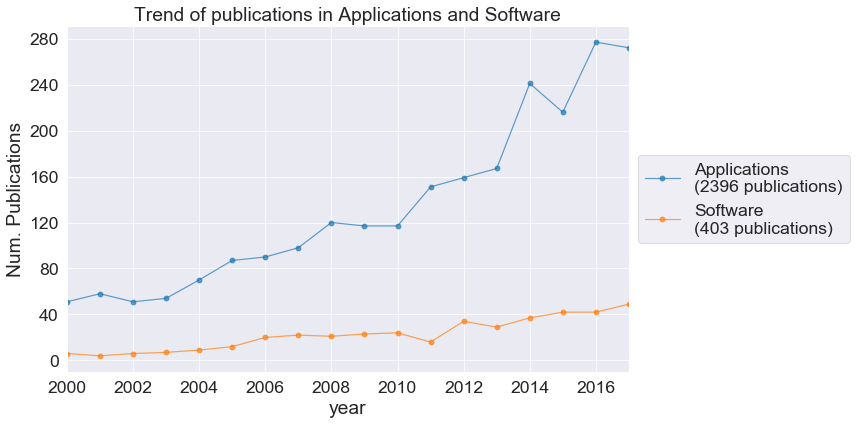

In [64]:
all_applications.name = 'Applications'
all_uc_software.name = 'Software'
wos_plot.plot_topic_trend([all_applications, all_uc_software],
                          title='Trend of publications in Applications and Software',
                          save_plot_fn='{}/Figure_6.png'.format(FIG_DIR))